In [1]:
import numpy as np

from scipy.optimize import fsolve
import matplotlib.pyplot as plt

l = 13 # l у основания
L = 4.25 #L
d = 12


# def kinematic_eq(z):
#     x = z[0]
#     y = z[1]
#     t1 = z[2]
#     t2 = z[3]

#     F = np.empty((4))
#     F[0] = (x-l*np.cos(t1)-L*np.cos(f1))
#     F[1] =         (x-l*np.cos(t2)-L*np.cos(f2)-d)
#     F[2] =         (y-l*np.sin(t1)-L*np.sin(f1))
#     F[3] =         (y-l*np.sin(t2)-L*np.sin(f2))
    
#     return F

# def myJac(z):
#     x = z[0]
#     y = z[1]
#     t1 = z[2]
#     t2 = z[3]
#     return [[1,0,l*np.sin(t1),0],
#             [1,0,0,l*np.sin(t2)],
#             [0,1,-l*np.cos(t1),0],
#             [0,1,0,-l*np.cos(t2)]]

# zGuess = np.array([1,1,1,1])
# z = fsolve(kinematic_eq,zGuess, fprime = myJac(zGuess))
# print(z)

In [2]:
appr = [ 
        [1,1,1,1,1],
        [1,1,1,1,-1],
        [1,1,1,-1,1],
        [1,1,1,-1,-1],
    
        [1,1,-1,1,1],
        [1,1,-1,1,-1],
        [1,1,-1,-1,1],
        [1,1,-1,-1,-1],
    
        [1,-1,1,1,1],
        [1,-1,1,1,-1],
        [1,-1,1,-1,1],
        [1,-1,1,-1,-1],
    
        [1,-1,-1,1,1],
        [1,-1,-1,1,-1],
        [1,-1,-1,-1,1],
        [1,-1,-1,-1,-1],
    
        [-1,1,1,1,1],
        [-1,1,1,1,-1],
        [-1,1,1,-1,1],
        [-1,1,1,-1,-1],
    
        [-1,1,-1,1,1],
        [-1,1,-1,1,-1],
        [-1,1,-1,-1,1],
        [-1,1,-1,-1,-1],
    
        [-1,-1,1,1,1],
        [-1,-1,1,1,-1],
        [-1,-1,1,-1,1],
        [-1,-1,1,-1,-1],
    
        [-1,-1,-1,1,1],
        [-1,-1,-1,1,-1],
        [-1,-1,-1,-1,1],
        [-1,-1,-1,-1,-1]
        ]

In [3]:
import numpy as np
from scipy.optimize import fsolve

l = 13 # l у основания
L = 4.25 #L
d = 12

f1 = 0
f2 = 0


def kinematic_eq(z):
    x = z[0]
    y = z[1]
    t1 = z[2]
    t2 = z[3]
    f2 = z[4]

    F = np.empty((5))
    F[0] = (x-l*np.cos(t1)-L*np.cos(f1))
    F[1] = (x-l*np.cos(t2)-L*np.cos(f2)-d)
    F[2] = (y-l*np.sin(t1)-L*np.sin(f1))
    F[3] = (y-l*np.sin(t2)-L*np.sin(f2))
    F[4] = np.sin(f2-f1)
    
    return F

zGuess = np.array([1,1,1,1,1])
z = fsolve(kinematic_eq,zGuess)
print(z)

[ 6.00000001 12.88167303 14.00214164 14.27219225  3.14159266]


In [4]:
S = 1

In [5]:
#генерирую всевозможные углы
num = 7000
tol = 0.00000001
phi1 = np.linspace(0, 2*np.pi, num)
phi2 = []

sing2 = []

#перебираю все комбинации углов на удовлетворение условиям сингулярности
for k in range(len(phi1)):
#     phi2.append(phi1[k]+np.pi)
    sing2.append([phi1[k]])

In [8]:
z = []

for i in sing2:
    j=0
    while j < 32:
        f1 = i[0]
        zGuess = appr[j]
        x_tmp = fsolve(kinematic_eq,zGuess)
        f_tmp = kinematic_eq(x_tmp)
        ar_tmp = np.array(f_tmp)
        if np.linalg.norm(ar_tmp) < tol:
            z.append(np.append(x_tmp, f1))
        j+=1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [9]:
sing_xy1 = []

for i in z:
    sing_xy1.append([i[0],i[1]])
    

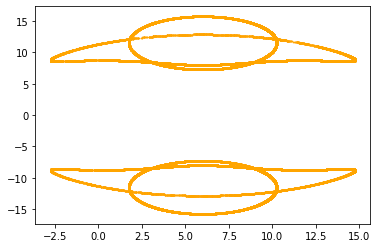

In [10]:
plt.scatter(*zip(*sing_xy1), color = 'orange', s=0.5)
plt.show()

In [ ]:
i=0
extra = []

while i < len(sing_xy1):
    if z[i][1] > -5 and z[i][1] < 5:
        extra.append(z[i])
    i+=1
print(extra)

In [ ]:
f1=extra[2][4]

ze = [extra[2][0],extra[2][1],extra[2][2],extra[2][3],extra[2][5]]
print(kinematic_eq(ze))

In [ ]:
check_right = [z[1][0],z[1][1],z[1][2],z[1][3],z[1][5]]
check_right

In [ ]:
f1 = z[1][4]
print(kinematic_eq(check_right))